In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import re

import geopandas as gpd
import requests,json


from shapely import geos
from shapely.geometry import Point
import fiona
from fiona.crs import from_epsg,from_string

from geopandas import GeoDataFrame
from shapely.geometry import Polygon
from geopandas import GeoSeries


from shapely import geometry
from shapely.geometry import shape,LineString,Point,Polygon


In [4]:
def trans(gdf):
    gdf.crs = {'init' :'epsg:3824'} # 避免資料沒設，這邊再重新給一次
    gdf=gdf.to_crs({'init' :'epsg:3826'})
    return gdf

def trans02(gdf):
    gdf.crs = {'init' :'epsg:4326'} # 避免資料沒設，這邊再重新給一次
    gdf=gdf.to_crs(epsg=3826)
    return gdf

In [5]:
gdf=gpd.read_file(r'C:/Users/RT009223/GIS/村里/VILLAGE_MOI_1090423.shp',encoding='utf-8')
gdf=gdf.loc[:,['COUNTYNAME','TOWNNAME','VILLNAME','geometry']]
gdf=trans(gdf)

In [6]:
gdf=gdf.dropna().reset_index(drop=True)
gdf.columns=['縣市','行政區','村里','geometry']
gdf['縣市']=list(gdf['縣市'].apply(lambda x:x.replace('臺','台')))
gdf['行政區']=list(gdf['行政區'].apply(lambda x:x.replace('臺','台')))
gdf['村里']=list(gdf['村里'].apply(lambda x:x.replace('臺','台')))

gdf['村里']=gdf['村里'].apply(lambda x:x.replace('舘','館'))
gdf['村里']=gdf['村里'].apply(lambda x:x.replace('双','雙'))
gdf['村里']=gdf['村里'].apply(lambda x:x.replace('石[曹]里','石𥕢里'))
gdf['村里']=gdf['村里'].apply(lambda x:x.replace('鷄林里','雞林里'))
gdf['村里']=gdf['村里'].apply(lambda x:x.replace('水磜村','水祭村'))
gdf['村里']=gdf['村里'].apply(lambda x:x.replace('珊湖里','珊瑚里'))

gdf['村里']=gdf['村里'].apply(lambda x:x.replace('欍','瓊'))

In [7]:
gdf['location']=gdf['縣市']+gdf['行政區']+gdf['村里']
gdf=gdf.loc[:,['location','縣市','行政區','村里','geometry']]
gdf

,location,縣市,行政區,村里,geometry
0,高雄市林園區中門里,高雄市,林園區,中門里,"POLYGON ((184944.359 2488573.475, 184590.382 2..."
1,高雄市林園區港埔里,高雄市,林園區,港埔里,"POLYGON ((185511.383 2488082.466, 185328.939 2..."
2,高雄市旗津區上竹里,高雄市,旗津區,上竹里,"POLYGON ((176963.681 2497193.949, 176556.101 2..."
3,高雄市旗津區中興里,高雄市,旗津區,中興里,"POLYGON ((178336.229 2495250.800, 178300.738 2..."
4,連江縣南竿鄉津沙村,連江縣,南竿鄉,津沙村,"POLYGON ((141692.824 2892627.730, 141692.254 2..."
...,...,...,...,...,...
7755,基隆市七堵區實踐里,基隆市,七堵區,實踐里,"POLYGON ((320735.822 2775136.209, 320780.474 2..."
7756,基隆市七堵區堵北里,基隆市,七堵區,堵北里,"MULTIPOLYGON (((320235.329 2775028.615, 320030..."
7757,基隆市七堵區堵南里,基隆市,七堵區,堵南里,"POLYGON ((320073.798 2775637.095, 319976.727 2..."
7758,基隆市暖暖區暖東里,基隆市,暖暖區,暖東里,"POLYGON ((325355.545 2775995.488, 325397.217 2..."


In [8]:
TLW=pd.read_excel(r'C:\Users\RT009223\TestriteGroup\滲透率專案\02_adjusted data\特力屋店點.xlsx')
geom=[Point(data.lon,data.lat) for idx, data in TLW.iterrows()]
crs = {'init': 'epsg:4326'}
TLW = gpd.GeoDataFrame(TLW, crs=crs, geometry=geom)
TLW=trans02(TLW)

In [9]:
gdf['geometry']=gdf.centroid

In [10]:
gdf.crs

<Projected CRS: EPSG:3826>
Name: TWD97 / TM2 zone 121
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Taiwan - 120°E to 122°E
- bounds: (119.99, 20.41, 122.06, 26.72)
Coordinate Operation:
- name: Taiwan 2-degree TM zone 121
- method: Transverse Mercator
Datum: Taiwan Datum 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
for i in range(TLW.shape[0]):
    gdf[TLW.name[i]]=round(gdf.distance(TLW.geometry[i])/1000,2)

In [12]:
gdf

,location,縣市,行政區,村里,geometry,1A01南崁店,1A02新莊店,1A03大順店,1A04台中店,1A05嘉義店,...,1G36新營金華店,1G37永康復國店,1G38大安安和店,1G39頭份中央店,1G40三民澄清店,1G41岡山大仁店,1G42永和得和店,1G44嘉義興業西店,1G45基隆義一店,1G46台中復興店
0,高雄市林園區中門里,高雄市,林園區,中門里,POINT (184847.316 2489682.499),296.19,299.48,14.64,180.60,110.50,...,89.06,57.24,304.53,248.26,14.79,32.92,300.14,106.78,323.39,180.60
1,高雄市林園區港埔里,高雄市,林園區,港埔里,POINT (185808.683 2488626.460),296.88,300.12,15.95,181.48,111.48,...,90.19,58.48,305.12,249.08,16.00,34.15,300.74,107.77,323.93,181.48
2,高雄市旗津區上竹里,高雄市,旗津區,上竹里,POINT (177030.280 2497902.666),291.08,294.80,6.74,174.03,103.28,...,80.62,47.91,300.27,242.13,8.51,24.10,295.81,99.50,319.56,174.03
3,高雄市旗津區中興里,高雄市,旗津區,中興里,POINT (178346.143 2496246.392),292.17,295.81,7.74,175.37,104.71,...,82.27,49.69,301.21,243.40,9.13,25.72,296.76,100.95,320.42,175.37
4,連江縣南竿鄉津沙村,連江縣,南竿鄉,津沙村,POINT (141613.161 2893441.850),185.08,195.66,391.71,237.26,298.20,...,317.07,349.21,205.77,188.63,391.29,373.30,205.15,301.60,215.41,237.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7755,基隆市七堵區實踐里,基隆市,七堵區,實踐里,POINT (320340.645 2774913.879),40.87,28.28,305.16,150.35,216.09,...,242.32,272.70,15.74,91.92,303.63,290.06,20.18,219.69,7.85,150.35
7756,基隆市七堵區堵北里,基隆市,七堵區,堵北里,POINT (319317.904 2775405.717),39.91,27.39,305.13,149.99,215.90,...,242.12,272.56,14.99,91.25,303.61,289.99,19.51,219.50,8.19,149.99
7757,基隆市七堵區堵南里,基隆市,七堵區,堵南里,POINT (319354.865 2774870.257),39.88,27.31,304.67,149.63,215.48,...,241.70,272.13,14.81,91.03,303.15,289.54,19.29,219.08,8.54,149.63
7758,基隆市暖暖區暖東里,基隆市,暖暖區,暖東里,POINT (326316.401 2773964.522),46.72,34.00,307.11,153.95,218.89,...,245.11,275.19,21.19,96.83,305.55,292.21,25.35,222.46,7.08,153.95


In [13]:
gdf.to_excel(r'C:\Users\RT009223\TestriteGroup\滲透率專案\04_TLW\divided\村里_店點.xlsx',index=False)

In [14]:
round(120.11611,2)

120.12

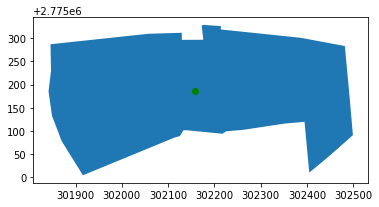

In [89]:
base=gdf[gdf['村里']=='百齡里'].plot()
gdf[gdf['村里']=='百齡里'].centroid.plot(ax=base, color='green')

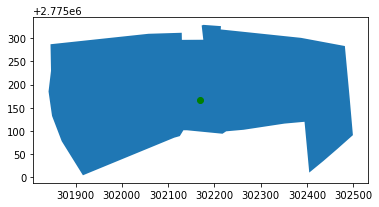

In [88]:
base=gdf[gdf['村里']=='百齡里'].plot()
gdf[gdf['村里']=='百齡里'].representative_point().plot(ax=base, color='green')
